In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install keras
!pip install tensorflow --user

In [2]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn import metrics

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

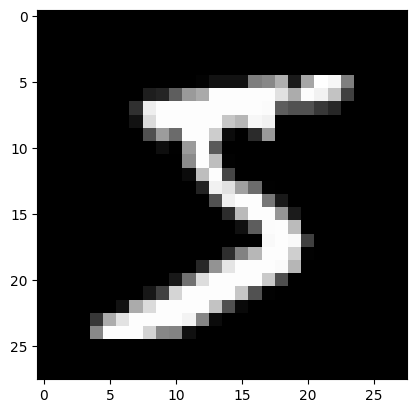

In [4]:
plt.imshow(x_train[0], cmap='gray')
plt.show()

In [5]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [6]:
print("X_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", x_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [7]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')

In [8]:
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [9]:
num_classes = 10
y_train = np.eye(num_classes)[y_train]
y_test = np.eye(num_classes)[y_test]

In [10]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu')) #returns a sequence of another vectors of dimension 512
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

In [11]:
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

In [12]:
batch_size = 128
epochs = 20
history = model.fit(x_train, y_train, batch_size=batch_size,epochs=epochs, verbose=1,validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 7s 13ms/step - loss: 0.2560 - accuracy: 0.9218 - val_loss: 0.1211 - val_accuracy: 0.9609
Epoch 2/20
469/469 [==============================] - 6s 12ms/step - loss: 0.1021 - accuracy: 0.9686 - val_loss: 0.0886 - val_accuracy: 0.9728
Epoch 3/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0743 - accuracy: 0.9764 - val_loss: 0.0637 - val_accuracy: 0.9811
Epoch 4/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0582 - accuracy: 0.9815 - val_loss: 0.0610 - val_accuracy: 0.9816
Epoch 5/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0463 - accuracy: 0.9851 - val_loss: 0.0644 - val_accuracy: 0.9804
Epoch 6/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0399 - accuracy: 0.9868 - val_loss: 0.0669 - val_accuracy: 0.9814
Epoch 7/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0337 - accuracy: 0.9890 - val_loss: 0.0694 - val_accuracy: 0.9823

In [13]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.08197356015443802
Test accuracy: 0.9835000038146973
